# ❤️ Task 3: Heart Disease Prediction

We will build a classification model to predict whether a patient is at risk of heart disease using the UCI Heart Disease dataset.


In [60]:
# Basic tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models and metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from mpl_toolkits.mplot3d import Axes3D

# Settings
sns.set(style="whitegrid", palette="Set2")


## 📥 Load Dataset

We’ll load the UCI Heart Disease dataset (e.g., `heart.csv`) using pandas.


In [78]:
df = pd.read_csv('heart.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## 🔍 Data Overview

Explore shape, columns, data types, and summary statistics.


In [62]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.info()
df.describe()


Shape: (1025, 14)
Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## 🧼 Data Cleaning

Check and handle missing/null values if present.


In [63]:
# Check for missing values
print(df.isnull().sum())

# Drop or impute if needed (this dataset has none)
df.dropna(inplace=True)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


## 📊 Exploratory Data Analysis (EDA)

Visualize correlations and class distributions.


### Target Distribution

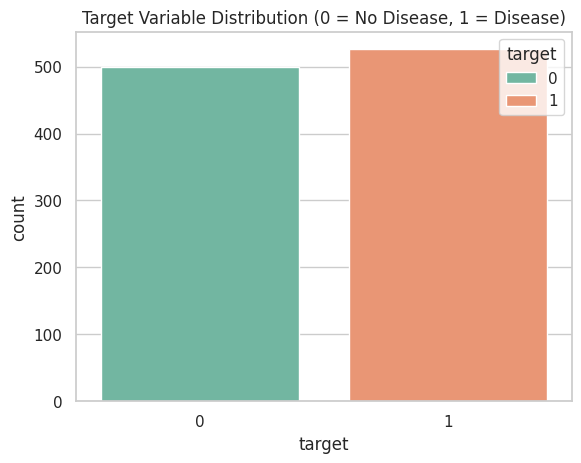

In [64]:
sns.countplot(data=df, x='target',hue = 'target', palette='Set2')
plt.title("Target Variable Distribution (0 = No Disease, 1 = Disease)")
plt.show()


### Correlation Heatmap

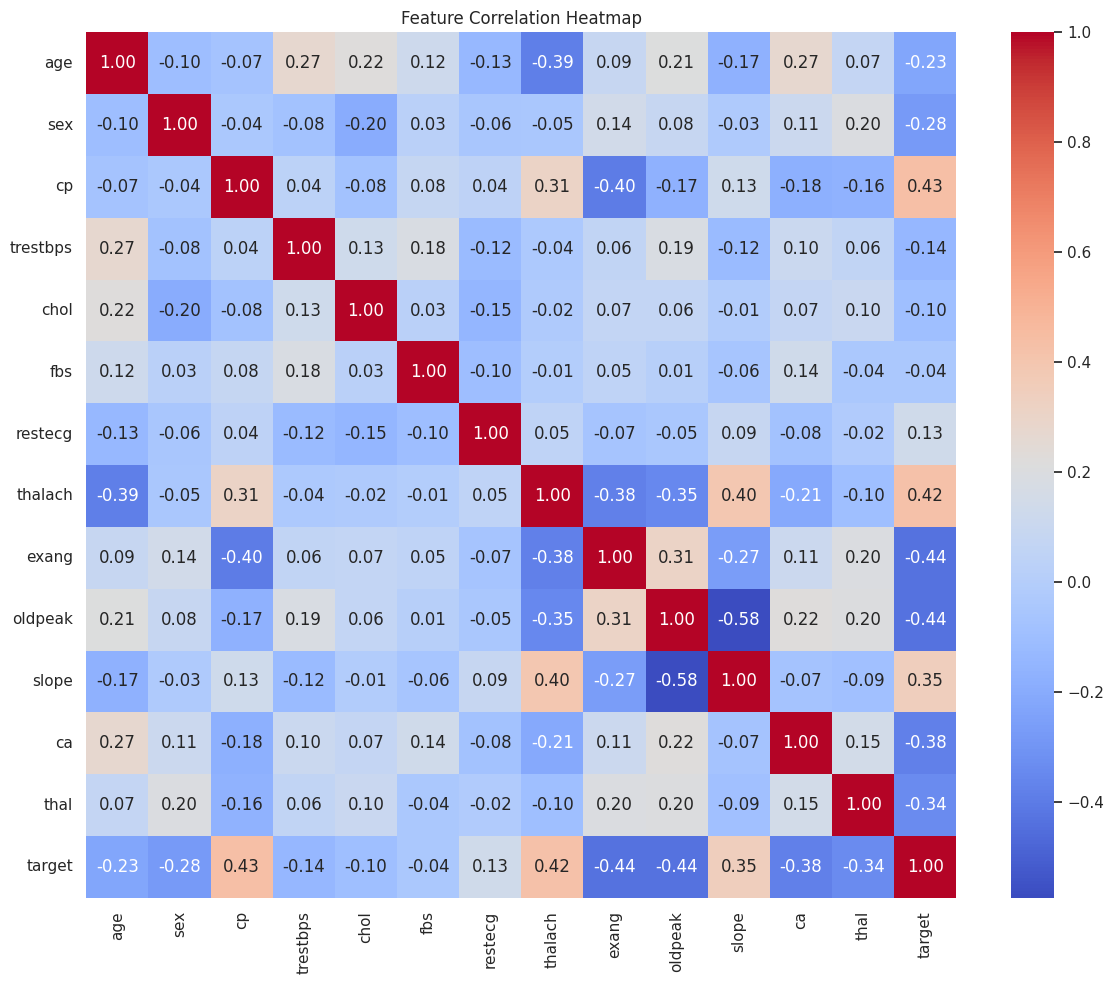

In [65]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


## ❤️ Age vs Max Heart Rate (Colored by Disease)

Helps visualize how heart rate varies with age across classes.


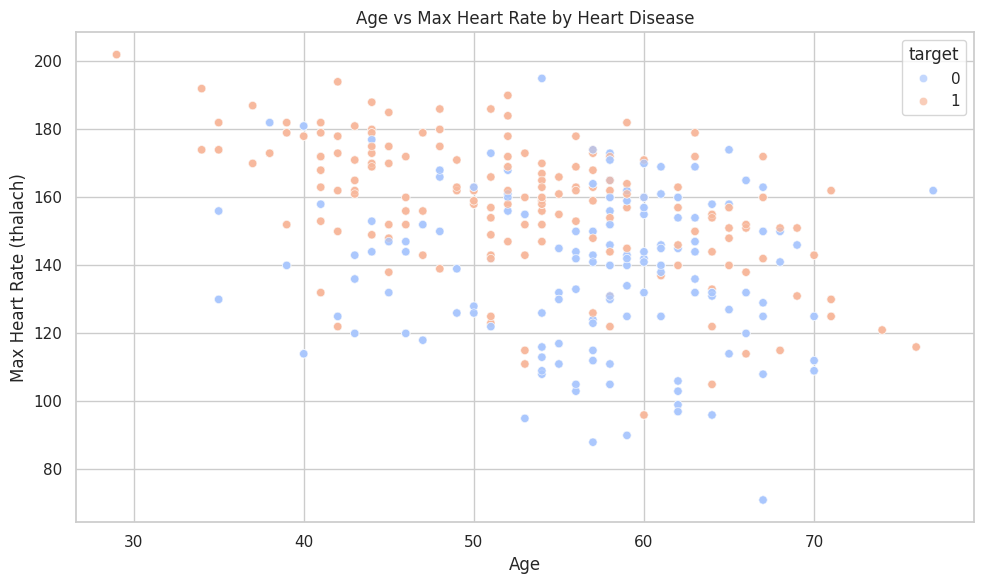

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='thalach', hue='target', palette='coolwarm', alpha=0.7)
plt.title("Age vs Max Heart Rate by Heart Disease")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate (thalach)")
plt.tight_layout()
plt.show()


## 🩺 Chest Pain Type vs Heart Disease

Categorical chest pain types (0-3) vs disease presence.


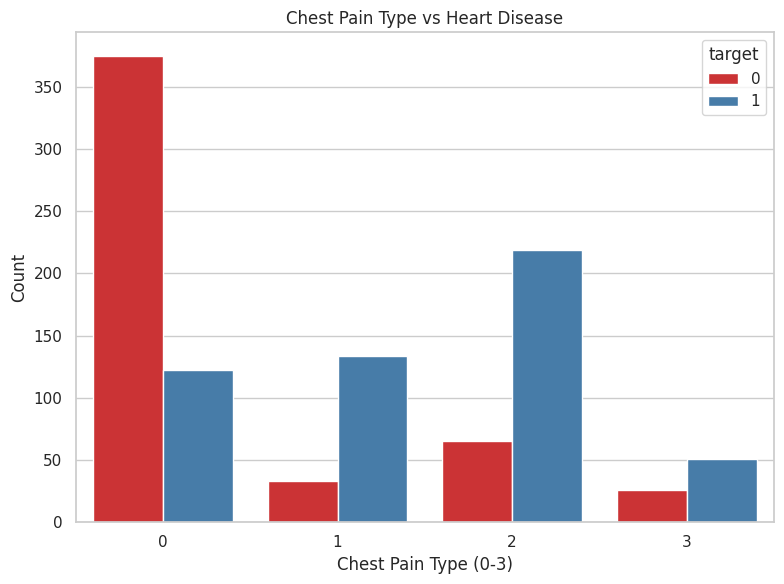

In [67]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='cp', hue='target', palette='Set1')
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type (0-3)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


## 🧠3D Scatter – Age, Cholesterol, Target

Visualize patient distribution across age, cholesterol, and disease.


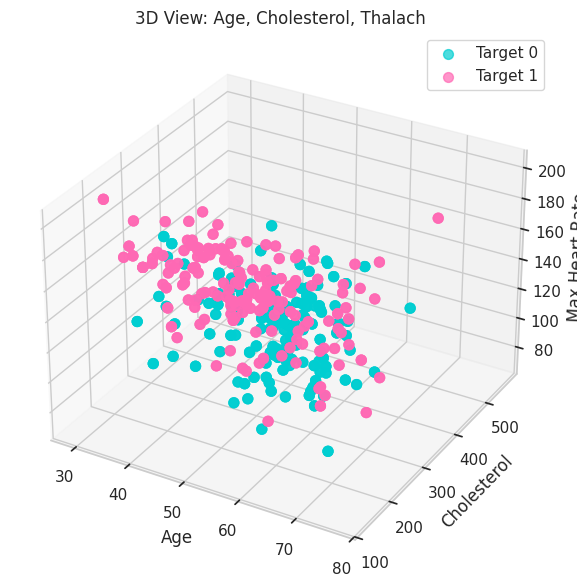

In [68]:

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

colors = {0: '#00CED1', 1: '#FF69B4'}
for t in df['target'].unique():
    sub = df[df['target'] == t]
    ax.scatter(sub['age'], sub['chol'], sub['thalach'],
               label=f'Target {t}', color=colors[t], alpha=0.7, s=50)

ax.set_xlabel("Age")
ax.set_ylabel("Cholesterol")
ax.set_zlabel("Max Heart Rate")
ax.set_title("3D View: Age, Cholesterol, Thalach")
ax.legend()
plt.tight_layout()
plt.show()


## 🧪 Boxplot of Cholesterol by Target

Shows spread of cholesterol levels with respect to heart disease.


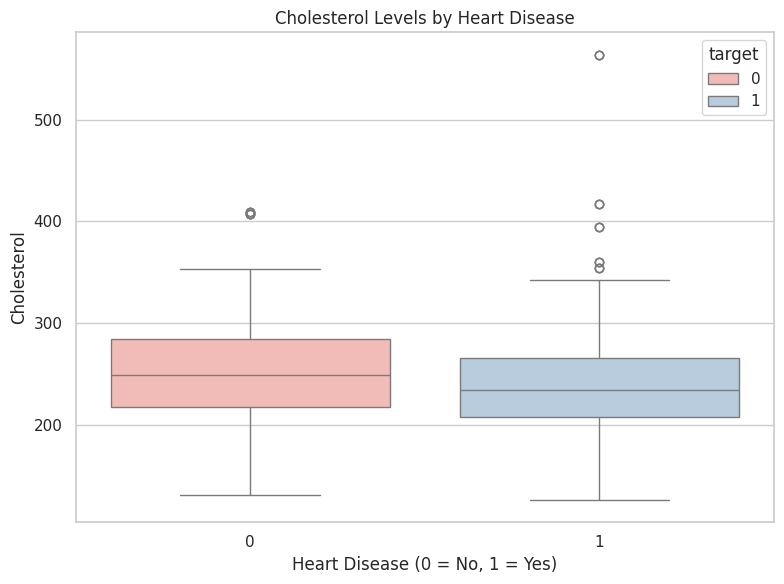

In [69]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='target', y='chol', palette='Pastel1',hue='target')
plt.title("Cholesterol Levels by Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Cholesterol")
plt.tight_layout()
plt.show()


## 🧬 3D Scatter – Resting BP, Max Heart Rate, Age

Another 3D view showing how these features cluster between patients.


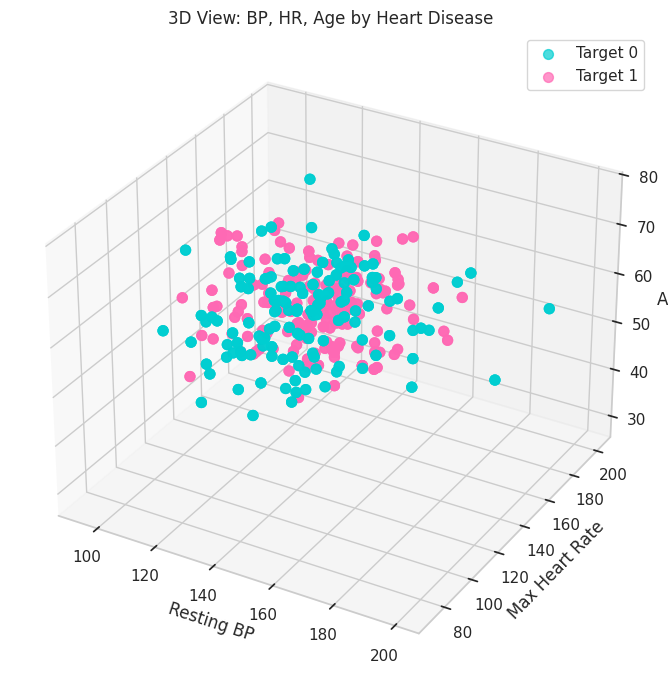

In [70]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for t in df['target'].unique():
    sub = df[df['target'] == t]
    ax.scatter(sub['trestbps'], sub['thalach'], sub['age'],
               label=f'Target {t}', color=colors[t], alpha=0.7, s=50)

ax.set_xlabel("Resting BP")
ax.set_ylabel("Max Heart Rate")
ax.set_zlabel("Age")
ax.set_title("3D View: BP, HR, Age by Heart Disease")
ax.legend()
plt.tight_layout()
plt.show()


## Distribution of age

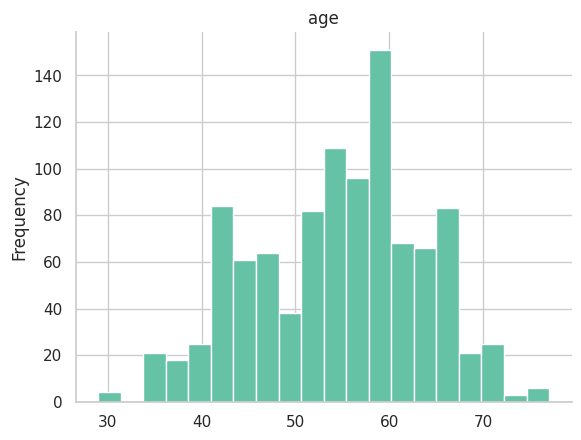

In [80]:
from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

## 🔗  Pairplot of Key Features by Heart Disease

This pairplot visualizes the pairwise relationships between features like age, cholesterol, resting blood pressure, and maximum heart rate.  
Data points are colored by the presence (`target = 1`) or absence (`target = 0`) of heart disease to reveal separation patterns.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


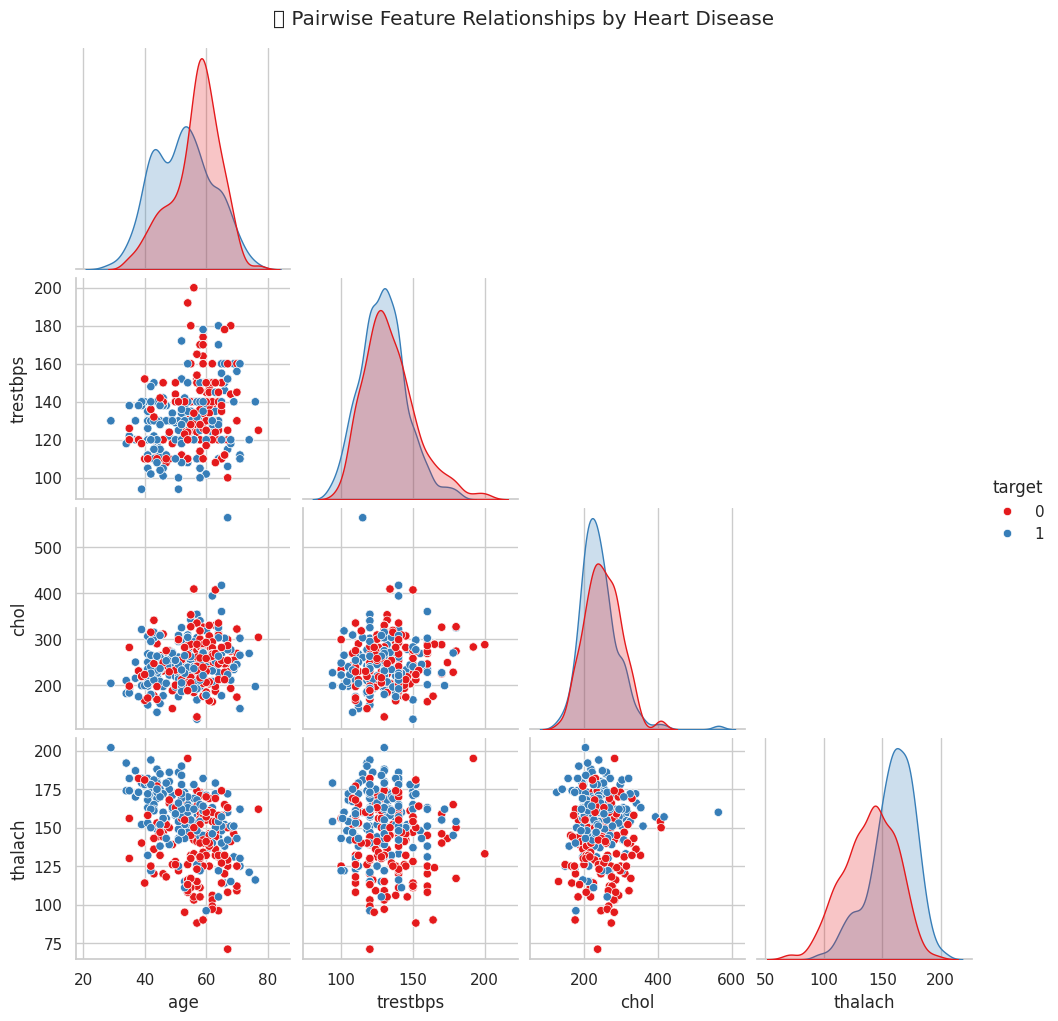

In [81]:
# Pairplot of selected features colored by heart disease status
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'target']],
             hue='target', palette='Set1', corner=True, diag_kind='kde')
plt.suptitle("🔗 Pairwise Feature Relationships by Heart Disease", y=1.02)
plt.show()


## 🧪 Train/Test Split

Split features and target, then train/test sets.


In [71]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 🤖 Train Logistic Regression Model


In [72]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)


## 📏 Evaluation: Logistic Regression


Accuracy: 0.80


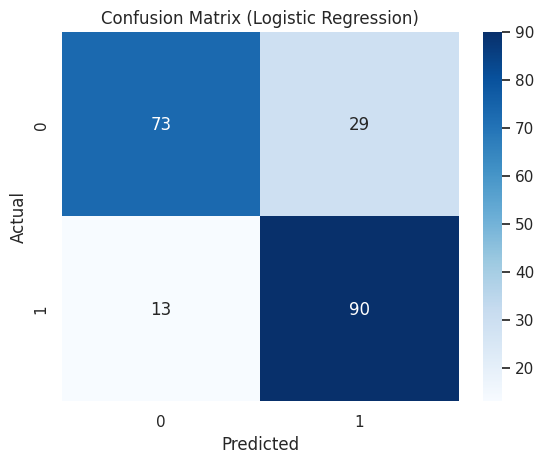

In [73]:
acc_log = accuracy_score(y_test, y_pred_log)
cm_log = confusion_matrix(y_test, y_pred_log)

print(f"Accuracy: {acc_log:.2f}")
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## 📉  ROC Curve – Logistic Regression

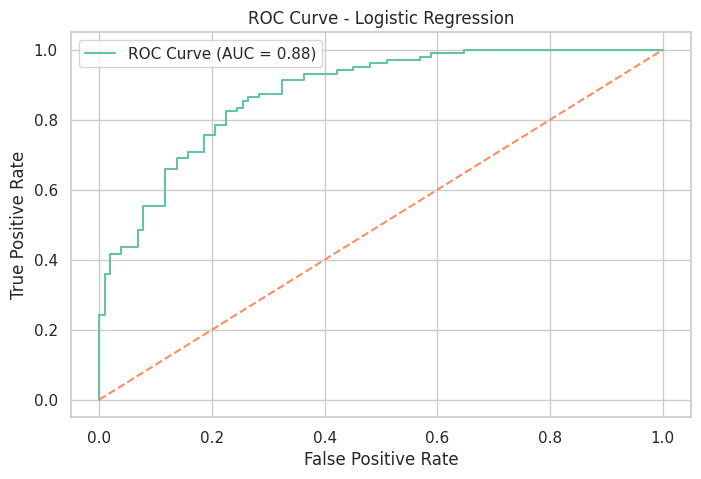

In [74]:
y_prob_log = log_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_log)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_prob_log):.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


## 🌳 Train Decision Tree Classifier


In [75]:
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)


## 📏 Evaluation: Decision Tree

Accuracy: 0.80


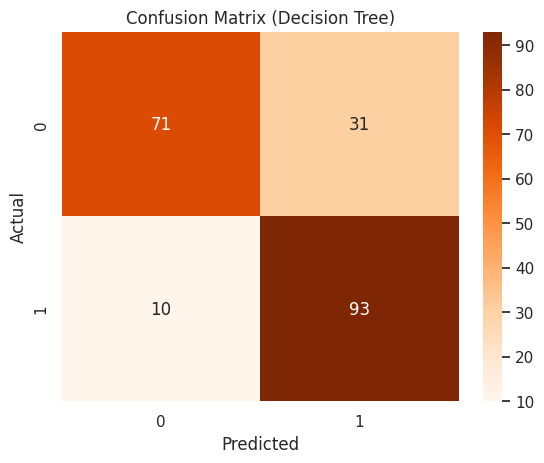

In [76]:
acc_tree = accuracy_score(y_test, y_pred_tree)
cm_tree = confusion_matrix(y_test, y_pred_tree)

print(f"Accuracy: {acc_tree:.2f}")
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix (Decision Tree)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## 📉  ROC Curve – Decision Tree Classifier

This ROC curve shows the true positive rate (TPR) vs false positive rate (FPR)  
for different thresholds of the Decision Tree model. The area under the curve (AUC)  
indicates how well the model separates the two classes.


/tmp/ipython-input-82-3789246906.py:16: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


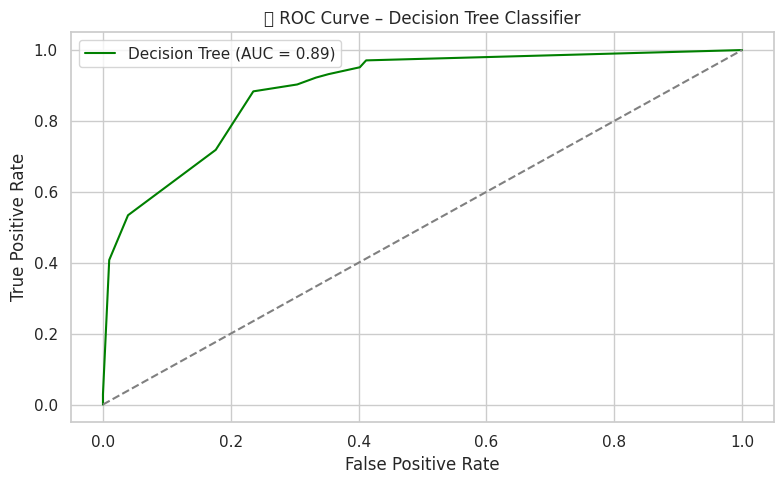

In [82]:
# Predict probabilities for class 1 (heart disease)
y_prob_tree = tree_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
auc_tree = roc_auc_score(y_test, y_prob_tree)

# Plot ROC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC = {auc_tree:.2f})", color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("📉 ROC Curve – Decision Tree Classifier")
plt.legend()
plt.tight_layout()
plt.show()


## 🔍 Feature Importance (Decision Tree)


/tmp/ipython-input-77-4117972281.py:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


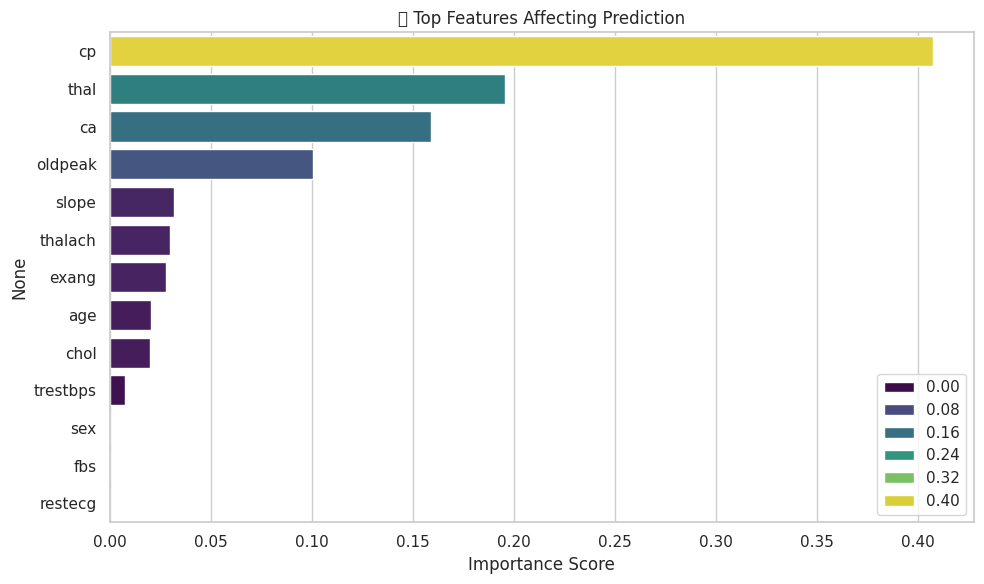

In [77]:
importances = pd.Series(tree_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values,hue = importances.values, y=importances.index, palette='viridis')
plt.title("📊 Top Features Affecting Prediction")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [83]:
import joblib

# Save Logistic Regression model
joblib.dump(log_model, "logistic_model.pkl")

# Save Decision Tree model
joblib.dump(tree_model, "decision_tree_model.pkl")


['decision_tree_model.pkl']

## ✅ Conclusion

- Both models perform well, with logistic regression giving interpretable coefficients and decision tree offering feature importance.
- ROC curve and confusion matrix help compare classification quality.
- Age, chest pain type, and max heart rate appear most predictive.
